In [ ]:
### EDA 
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
df = pd.read_csv('sample_data/housing.csv')


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:

df.describe().round(decimals=2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.40,32.50,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.90,18.00,1447.75,296.00,787.00,280.00,2.60,119600.00
50%,-118.50,34.30,29.00,2127.00,435.00,1166.00,409.00,3.50,179700.00
75%,-118.00,37.70,37.00,3148.00,647.00,1725.00,605.00,4.70,264725.00
max,-114.30,42.00,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


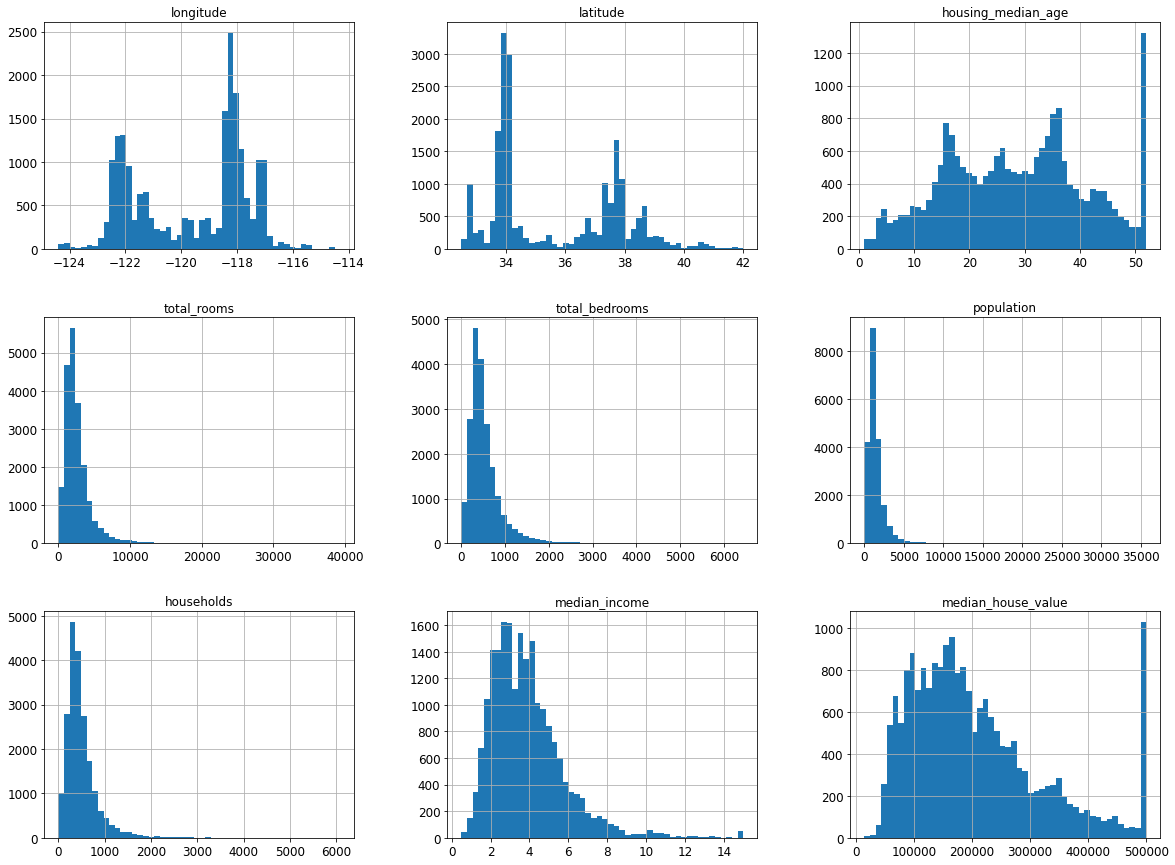

In [ ]:

df.hist(bins=50, figsize=(20,15))

plt.show()

In [ ]:
df.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.2,37.9,41.0,880.0,129.0,322.0,126.0,8.3,452600.0,NEAR BAY
1,-122.2,37.9,21.0,7099.0,1106.0,2401.0,1138.0,8.3,358500.0,NEAR BAY
2,-122.2,37.8,52.0,1467.0,190.0,496.0,177.0,7.3,352100.0,NEAR BAY
3,-122.2,37.8,52.0,1274.0,235.0,558.0,219.0,5.6,341300.0,NEAR BAY
4,-122.2,37.8,52.0,1627.0,280.0,565.0,259.0,3.8,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.1,39.5,25.0,1665.0,374.0,845.0,330.0,1.6,78100.0,INLAND
20636,-121.2,39.5,18.0,697.0,150.0,356.0,114.0,2.6,77100.0,INLAND
20637,-121.2,39.4,17.0,2254.0,485.0,1007.0,433.0,1.7,92300.0,INLAND
20638,-121.3,39.4,18.0,1860.0,409.0,741.0,349.0,1.9,84700.0,INLAND


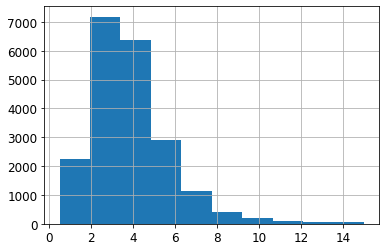

In [ ]:
df["median_income"].hist()

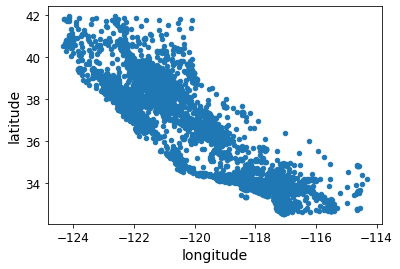

In [ ]:
df.plot(kind="scatter", x="longitude", y="latitude")

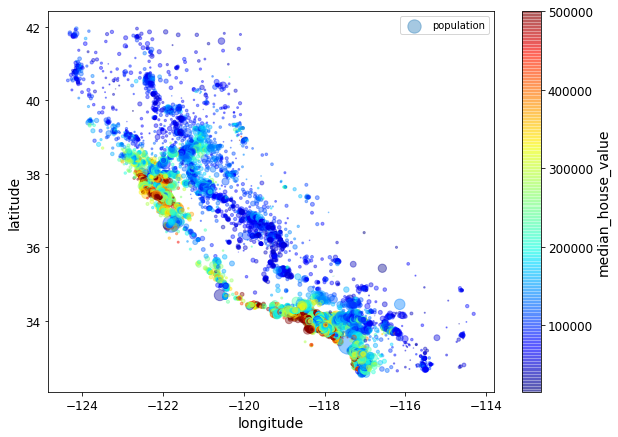

In [ ]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=df["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

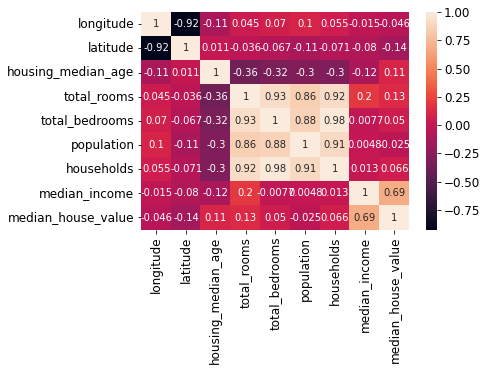

In [ ]:
import seaborn as sns
corr_matrix=df.corr()

sns.heatmap(corr_matrix, annot = True)

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efcb08f1410>,
      dtype=object)

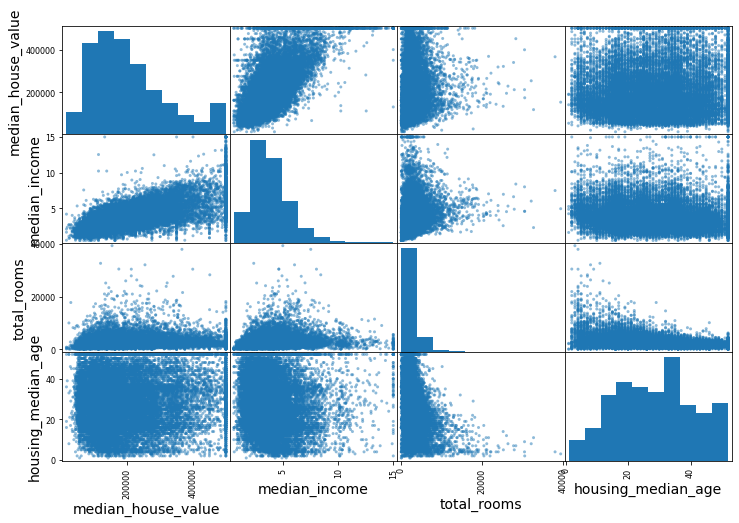

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 8))

(0.0, 16.0, 0.0, 550000.0)

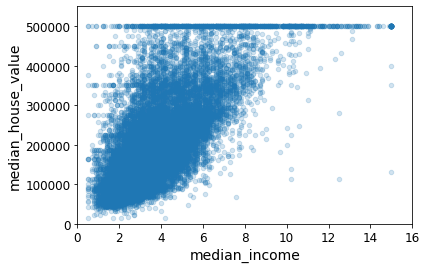

In [ ]:
df.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.2)
plt.axis([0, 16, 0, 550000])


In [ ]:
###pyspark 

import os
import pandas as pd
import numpy as np

# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

# install findspark using pip
!pip install -q findspark


In [ ]:
import findspark
findspark.init()
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext

from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import udf, col

from pyspark.ml.regression import LinearRegression
from pyspark.mllib.evaluation import RegressionMetrics

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, CrossValidatorModel
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# setting random seed for notebook reproducability
rnd_seed=23
np.random.seed=rnd_seed
np.random.set_state=rnd_seed

In [ ]:
spark = SparkSession.builder.master("local[2]").appName("Linear-Regression-California-Housing").getOrCreate()

In [ ]:
sc = spark.sparkContext
sc

<SparkContext master=local[2] appName=Linear-Regression-California-Housing>

In [ ]:
sqlContext = SQLContext(spark.sparkContext)
sqlContext

In [ ]:
HOUSING_DATA = 'sample_data/housing.csv'

In [ ]:
schema = StructType([
    StructField("long", FloatType(), nullable=True),
    StructField("lat", FloatType(), nullable=True),
    StructField("medage", FloatType(), nullable=True),
    StructField("totrooms", FloatType(), nullable=True),
    StructField("totbdrms", FloatType(), nullable=True),
    StructField("pop", FloatType(), nullable=True),
    StructField("houshlds", FloatType(), nullable=True),
    StructField("medinc", FloatType(), nullable=True),
    StructField("medhv", FloatType(), nullable=True)]
)

In [ ]:
# Load housing data
housing_df = spark.read.csv(path=HOUSING_DATA, schema=schema).cache()

In [ ]:
# Show first five rows

housing_df=housing_df.na.drop()

In [ ]:
housing_df.show(5)

+-------+-----+------+--------+--------+------+--------+------+--------+
|   long|  lat|medage|totrooms|totbdrms|   pop|houshlds|medinc|   medhv|
+-------+-----+------+--------+--------+------+--------+------+--------+
|-122.23|37.88|  41.0|   880.0|   129.0| 322.0|   126.0|8.3252|452600.0|
|-122.22|37.86|  21.0|  7099.0|  1106.0|2401.0|  1138.0|8.3014|358500.0|
|-122.24|37.85|  52.0|  1467.0|   190.0| 496.0|   177.0|7.2574|352100.0|
|-122.25|37.85|  52.0|  1274.0|   235.0| 558.0|   219.0|5.6431|341300.0|
|-122.25|37.85|  52.0|  1627.0|   280.0| 565.0|   259.0|3.8462|342200.0|
+-------+-----+------+--------+--------+------+--------+------+--------+
only showing top 5 rows



In [ ]:
# show the dataframe columns
housing_df.columns

['long',
 'lat',
 'medage',
 'totrooms',
 'totbdrms',
 'pop',
 'houshlds',
 'medinc',
 'medhv']

In [ ]:
# show the schema of the dataframe
housing_df.printSchema()

root
 |-- long: float (nullable = true)
 |-- lat: float (nullable = true)
 |-- medage: float (nullable = true)
 |-- totrooms: float (nullable = true)
 |-- totbdrms: float (nullable = true)
 |-- pop: float (nullable = true)
 |-- houshlds: float (nullable = true)
 |-- medinc: float (nullable = true)
 |-- medhv: float (nullable = true)



In [ ]:
# Add the new columns to `df`
housing_df = (housing_df.withColumn("rmsperhh", F.round(col("totrooms")/col("houshlds"), 2))
                       .withColumn("popperhh", F.round(col("pop")/col("houshlds"), 2))
                       .withColumn("bdrmsperrm", F.round(col("totbdrms")/col("totrooms"), 2)))

In [ ]:
# Inspect the result
housing_df.show(5)

+-------+-----+------+--------+--------+------+--------+------+--------+--------+--------+----------+
|   long|  lat|medage|totrooms|totbdrms|   pop|houshlds|medinc|   medhv|rmsperhh|popperhh|bdrmsperrm|
+-------+-----+------+--------+--------+------+--------+------+--------+--------+--------+----------+
|-122.23|37.88|  41.0|   880.0|   129.0| 322.0|   126.0|8.3252|452600.0|    6.98|    2.56|      0.15|
|-122.22|37.86|  21.0|  7099.0|  1106.0|2401.0|  1138.0|8.3014|358500.0|    6.24|    2.11|      0.16|
|-122.24|37.85|  52.0|  1467.0|   190.0| 496.0|   177.0|7.2574|352100.0|    8.29|     2.8|      0.13|
|-122.25|37.85|  52.0|  1274.0|   235.0| 558.0|   219.0|5.6431|341300.0|    5.82|    2.55|      0.18|
|-122.25|37.85|  52.0|  1627.0|   280.0| 565.0|   259.0|3.8462|342200.0|    6.28|    2.18|      0.17|
+-------+-----+------+--------+--------+------+--------+------+--------+--------+--------+----------+
only showing top 5 rows



In [ ]:
featureCols = [ "pop", "houshlds", "medinc", "rmsperhh", "popperhh", "bdrmsperrm"]

In [97]:
featureCols = ["long","lat","medage","totrooms","totbdrms", "pop", "houshlds", "medinc", "rmsperhh", "popperhh", "bdrmsperrm"]

In [98]:
# put features into a feature vector column
assembler = VectorAssembler(inputCols=featureCols, outputCol="features") 
assembled_df = assembler.transform(housing_df)
assembled_df.show(5)


+-------+-----+------+--------+--------+------+--------+------+--------+--------+--------+----------+--------------------+
|   long|  lat|medage|totrooms|totbdrms|   pop|houshlds|medinc|   medhv|rmsperhh|popperhh|bdrmsperrm|            features|
+-------+-----+------+--------+--------+------+--------+------+--------+--------+--------+----------+--------------------+
|-122.23|37.88|  41.0|   880.0|   129.0| 322.0|   126.0|8.3252|452600.0|    6.98|    2.56|      0.15|[-122.23000335693...|
|-122.22|37.86|  21.0|  7099.0|  1106.0|2401.0|  1138.0|8.3014|358500.0|    6.24|    2.11|      0.16|[-122.22000122070...|
|-122.24|37.85|  52.0|  1467.0|   190.0| 496.0|   177.0|7.2574|352100.0|    8.29|     2.8|      0.13|[-122.23999786376...|
|-122.25|37.85|  52.0|  1274.0|   235.0| 558.0|   219.0|5.6431|341300.0|    5.82|    2.55|      0.18|[-122.25,37.84999...|
|-122.25|37.85|  52.0|  1627.0|   280.0| 565.0|   259.0|3.8462|342200.0|    6.28|    2.18|      0.17|[-122.25,37.84999...|
+-------+-----+-

In [99]:
output=assembler.transform(housing_df)
f_data=output.select('features','medhv')
f_data.show(5)


+--------------------+--------+
|            features|   medhv|
+--------------------+--------+
|[-122.23000335693...|452600.0|
|[-122.22000122070...|358500.0|
|[-122.23999786376...|352100.0|
|[-122.25,37.84999...|341300.0|
|[-122.25,37.84999...|342200.0|
+--------------------+--------+
only showing top 5 rows



In [100]:
train_data,test_data= f_data.randomSplit([0.80,0.20])

In [101]:
regressor=LinearRegression(featuresCol='features',labelCol='medhv')
regressor=regressor.fit(train_data)

In [102]:
coeff=regressor.coefficients
intr=regressor.intercept


print("The coefficient of the model is found to be: %a" %coeff)
print("The intercept of the model is found to be: %f" %intr)

The coefficient of the model is found to be: DenseVector([-41204.1645, -40818.8183, 1153.9309, 1.2467, 19.6992, -39.5982, 102.3697, 42335.7817, 2733.3012, 37.4894, 306104.3453])
The intercept of the model is found to be: -3551245.547933


In [103]:
pred= regressor.evaluate(test_data)
pred.predictions.show(5)

+--------------------+--------+------------------+
|            features|   medhv|        prediction|
+--------------------+--------+------------------+
|[-124.34999847412...| 94600.0|176745.18274430744|
|[-124.26999664306...| 79000.0|151310.92764179176|
|[-124.26000213623...|111400.0| 156152.9409967945|
|[-124.20999908447...| 66900.0|64561.509985538665|
|[-124.19000244140...| 90100.0| 163875.7674509473|
+--------------------+--------+------------------+
only showing top 5 rows



In [104]:
from pyspark.ml.evaluation import RegressionEvaluator
eval=RegressionEvaluator(labelCol='medhv',predictionCol='prediction',metricName='rmse')

rmse=eval.evaluate(pred.predictions)
print("RMSE : %.3f" %rmse)

mse=eval.evaluate(pred.predictions,{eval.metricName:"mse"})
print("MSE : %.3f" %mse)

mae=eval.evaluate(pred.predictions,{eval.metricName:"mae"})
print("MAE : %.3f" % mae)

r2=eval.evaluate(pred.predictions,{eval.metricName:"r2"})
print("r2 : %.3f" %r2)

RMSE : 67313.985
MSE : 4531172636.615
MAE : 49268.671
r2 : 0.662


In [105]:
from pyspark.ml.regression import GeneralizedLinearRegression
glr = GeneralizedLinearRegression(featuresCol='features',labelCol='medhv',family="gaussian", link="identity", maxIter=10, regParam=0.3)

# Fit the model
model = glr.fit(train_data)

In [106]:
# Print the coefficients and intercept for generalized linear regression model
print("Coefficients: " + str(model.coefficients))
print("Intercept: " + str(model.intercept))

Coefficients: [-41202.49306182078,-40817.19419189196,1153.9572892411657,1.2464790661458756,19.705993581796594,-39.596854765618765,102.36031067839859,42336.01158194664,2733.091740456238,37.474691538510065,306102.3476849386]
Intercept: -3551103.7121790885


In [107]:
predglm= model.evaluate(test_data)
predglm.predictions.show(5)

+--------------------+--------+------------------+
|            features|   medhv|        prediction|
+--------------------+--------+------------------+
|[-124.34999847412...| 94600.0|176745.36992817232|
|[-124.26999664306...| 79000.0| 151311.2757902327|
|[-124.26000213623...|111400.0|156153.04562893743|
|[-124.20999908447...| 66900.0|64563.114942914806|
|[-124.19000244140...| 90100.0|163876.19865426607|
+--------------------+--------+------------------+
only showing top 5 rows



In [108]:
from pyspark.ml.evaluation import RegressionEvaluator
eval=RegressionEvaluator(labelCol='medhv',predictionCol='prediction',metricName='rmse')

rmse=eval.evaluate(predglm.predictions)
print("RMSE : %.3f" %rmse)

mse=eval.evaluate(predglm.predictions,{eval.metricName:"mse"})
print("MSE : %.3f" %mse)

mae=eval.evaluate(predglm.predictions,{eval.metricName:"mae"})
print("MAE : %.3f" % mae)

r2=eval.evaluate(predglm.predictions,{eval.metricName:"r2"})
print("r2 : %.3f" %r2)

RMSE : 67314.030
MSE : 4531178569.615
MAE : 49268.667
r2 : 0.662


In [114]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'medhv')
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)
dt_evaluator = RegressionEvaluator(
    labelCol="medhv", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

dt_evaluator1 = RegressionEvaluator(
    labelCol="medhv", predictionCol="prediction", metricName="mse")
mse = dt_evaluator1.evaluate(dt_predictions)
print(" Mean Squared Error (MSE) on test data = %g" % mse)

dt_evaluator2 = RegressionEvaluator(
    labelCol="medhv", predictionCol="prediction", metricName="mae")
mae = dt_evaluator2.evaluate(dt_predictions)
print(" Mean absolute Error  on test data = %g" % mae)

dt_evaluator3 = RegressionEvaluator(
    labelCol="medhv", predictionCol="prediction", metricName="r2")
r2 = dt_evaluator3.evaluate(dt_predictions)
print("R  Squared Error on test data = %g" % r2)


Root Mean Squared Error (RMSE) on test data = 71901.5
 Mean Squared Error (MSE) on test data = 5.16983e+09
 Mean absolute Error  on test data = 52508.4
R  Squared Error on test data = 0.614517


In [115]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'medhv', maxIter=10)
gbt_model = gbt.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)
gbt_predictions.select('prediction', 'medhv', 'features').show(5)

+------------------+--------+--------------------+
|        prediction|   medhv|            features|
+------------------+--------+--------------------+
| 81171.68509095251| 94600.0|[-124.34999847412...|
|102781.51969634286| 79000.0|[-124.26999664306...|
| 81162.89084822913|111400.0|[-124.26000213623...|
|  67410.2775435506| 66900.0|[-124.20999908447...|
|127819.19517613544| 90100.0|[-124.19000244140...|
+------------------+--------+--------------------+
only showing top 5 rows



In [117]:
gbt_evaluator = RegressionEvaluator(
    labelCol="medhv", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

gbt_evaluator1 = RegressionEvaluator(
    labelCol="medhv", predictionCol="prediction", metricName="mse")
mse = gbt_evaluator1.evaluate(gbt_predictions)
print(" Mean Squared Error (MSE) on test data = %g" % mse)

gbt_evaluator2 = RegressionEvaluator(
    labelCol="medhv", predictionCol="prediction", metricName="mae")
mae = gbt_evaluator2.evaluate(gbt_predictions)
print(" Mean absolute Error  on test data = %g" % mae)

gbt_evaluator3 = RegressionEvaluator(
    labelCol="medhv", predictionCol="prediction", metricName="r2")
r2 = gbt_evaluator3.evaluate(gbt_predictions)
print("R  Squared Error on test data = %g" % r2)


Root Mean Squared Error (RMSE) on test data = 60336.7
 Mean Squared Error (MSE) on test data = 3.64051e+09
 Mean absolute Error  on test data = 42168.7
R  Squared Error on test data = 0.728549


In [ ]:
spark.stop()

https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb

https://spark.apache.org/docs/latest/ml-classification-regression.html#decision-tree-regression
